##Modificación para trazar un cuadrado en el complejo palne con centro en (z_c_r, z_c_i) y de tamaño zw x zh


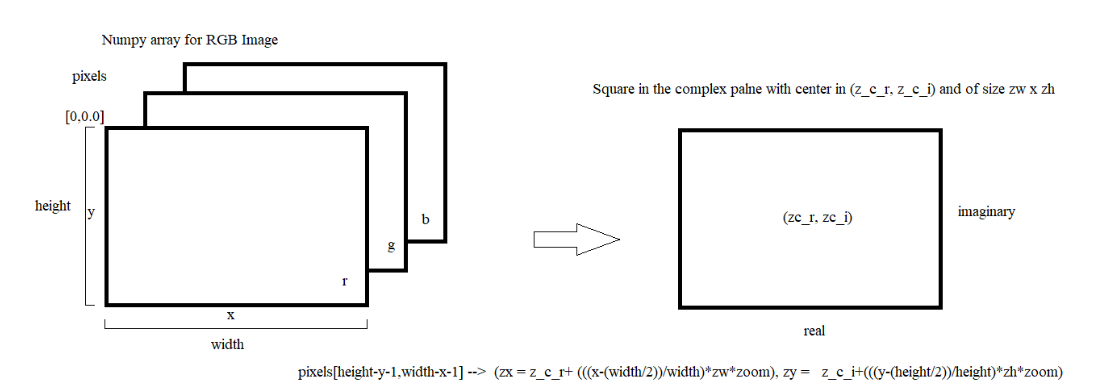

In [106]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from tqdm import tqdm
from time import sleep

In [99]:
def f(l,z):

    if(l == 0):
        return (z**3)-1
    elif(l == 1):
        return z**3 - 2*z +2
    elif(l == 2):
        return z**8 + 15*(z**4)-16
    elif(l == 3):
        return z**6+z**3-1
    elif(l==4):
        return math.sin(z)
    



In [107]:

def df(l,z):
    if(l == 0):
        return 3*(z**2)
    elif(l == 1):
        return 2*z**2 - 2
    elif(l == 2):
        return 8*z**7 + 60*(z**3)
    elif(l == 3):
        return 6*z**5+3*z**2
    elif(l==4):
        return math.cos(z)
    

In [108]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=250, height=250, zoom=1,  niter=256, l=0):
    """ Fractals using newton-raphson """

    rem = Symbol("z", real = True)

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
#     fun = f(l,rem)
#     der = diff(fun,rem)
#     print(type(fun))
#     ter = len(factor_list(fun)[1])

    print(z_c_r, " | ", z_c_i, " | ", zh, " | ", zw, " | ", width, " | ", height, " | ", zoom, " | ", niter, " | ",l)
#     return
    for y in tqdm(range(height)):
        sleep(0.2)
        zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)
#         print("hola")
        for x in range(width):
            zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

            # Mapping real -> complex plane
            z = complex(zx, zy)
            
            
            count = 0
            # print("hola")
            for i in range(niter):
                # complex numerical derivative
#                 print(dz)
#                 dz = complex(der.subs(rem,z))
                dz = df(l,z)
                if dz == 0:
                    break
                
                count += 1
                if count > 255:
                    break
#                 t = factor_list(fun)
#                 complex(fun.subs(rem,z)
#                 print(l)
                znext = z - (f(l,z)/dz) # Newton iteration
                #print(abs(znext - z), " | ", eps)

                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext

            # Pixels colored using the roots
            if abs(z-r1)<eps:
                # color red
                pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
            elif abs(z-r2)<=eps:
                # color green
                pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
            elif abs(z-r3)<=eps:
                # color blue
                pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
            else:   
                pixels[height-y-1,x] = (0, 0, 0)

    return pixels
    
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, l=0):
    
    """ Display a newton-raphson fractal """
    x = Symbol("z", real = True)
    fun = f(l,x)
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, l=l)
    
    plt.title('Newton Fractal f(z) = ' + str(fun))
    
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
(1, [(z - 1, 1), (z**2 + z + 1, 1)])
2
0  |  0  |  1  |  1  |  500  |  500  |  1  |  256  |  0


100%|██████████| 500/500 [01:46<00:00,  4.72it/s]


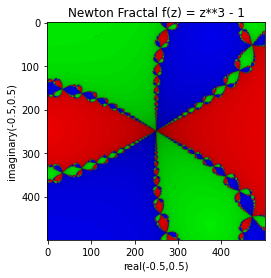

In [95]:
print("zoom out")
display1(zoom=1,l=0)

  0%|          | 0/500 [00:00<?, ?it/s]

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
(1, [(z**3 - 2*z + 2, 1)])
1
0  |  0  |  1  |  1  |  500  |  500  |  1  |  256  |  1


100%|██████████| 500/500 [01:48<00:00,  4.60it/s]


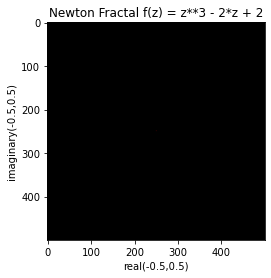

In [102]:
print("zoom out")
display1(zoom=1,l=1)

  0%|          | 0/500 [00:00<?, ?it/s]

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
(1, [(z - 1, 1), (z + 1, 1), (z**2 + 1, 1), (z**4 + 16, 1)])
4
0  |  0  |  1  |  1  |  500  |  500  |  1  |  256  |  2


100%|██████████| 500/500 [01:52<00:00,  4.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


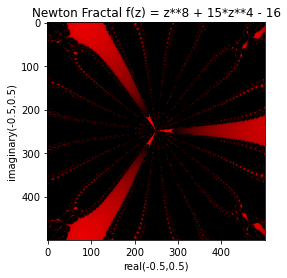

In [101]:
print("zoom out")
display1(zoom=1,l=2)

  0%|          | 0/500 [00:00<?, ?it/s]

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )
(1, [(z**6 + z**3 - 1, 1)])
1
0  |  0  |  1  |  1  |  500  |  500  |  1  |  256  |  3


100%|██████████| 500/500 [01:48<00:00,  4.60it/s]


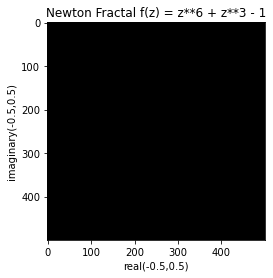

In [103]:
print("zoom out")
display1(zoom=1,l=3)

In [110]:
print("zoom out")
display1(zoom=1,l=4)

zoom out


TypeError: can't convert expression to float

##Plot of f(z)= z for the reals f(x)= z

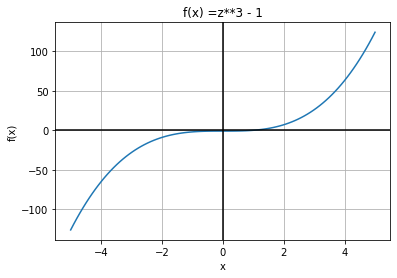

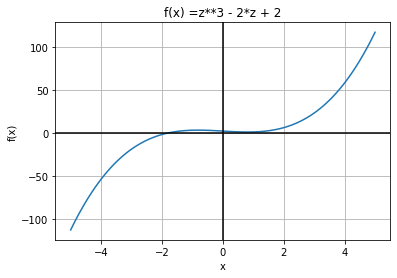

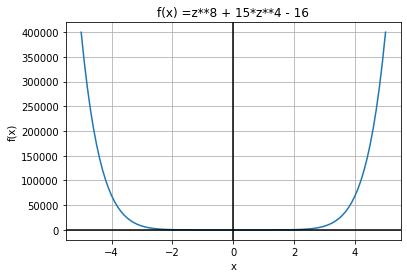

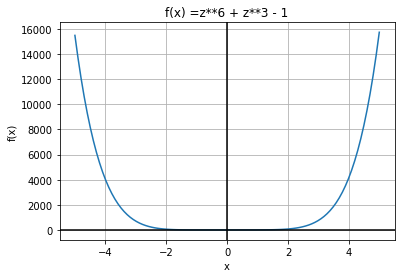

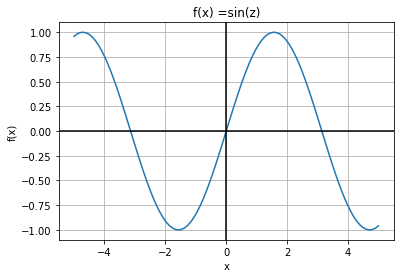

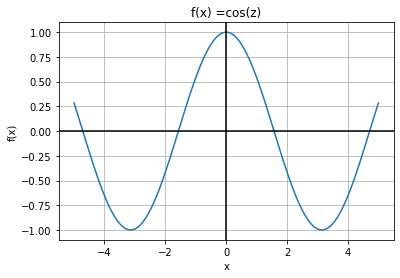

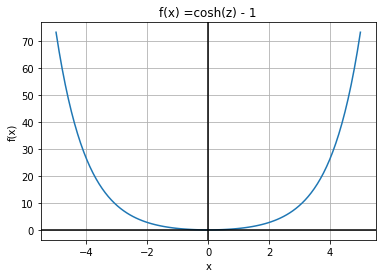

In [84]:

def tor(l):

  z = Symbol("z", real = True)
  x = np.linspace(-5.0,5.0,100)
  fig, ax = plt.subplots()
  s = f(l,z)
  m = []
  for i in x:
    m.append(s.subs(z,i))
  t = np.array(m)
  ax.plot(x,t)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x) =' + str(s))
  plt.xlabel('x')
  plt.ylabel('f(x)')

for i in range(7):
  tor(i)

# Graficas

## Newton iterates form z=10.0 + 0.0j

In [112]:
def graficar(l,z):
    r=[]
    i=[]
    for k in range(50):
      dz = df(l,z)
      z = z - f(l,z) / dz # Newton iteration
      r.append(np.real(z))
      i.append(np.imag(z))
    plt.title('Newton iterates form z='+str(z))
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

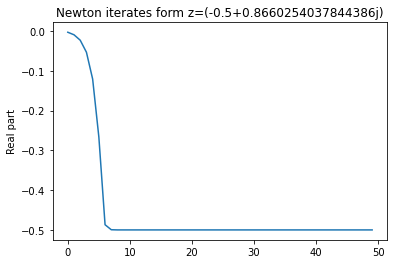

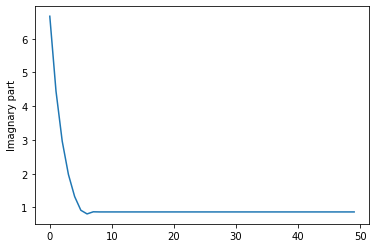

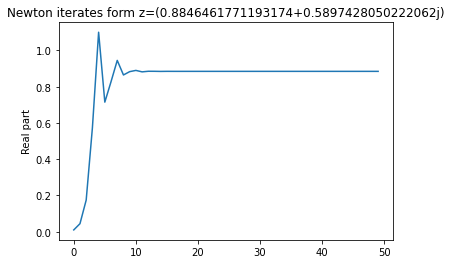

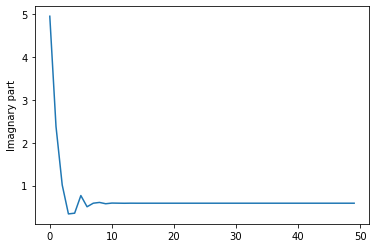

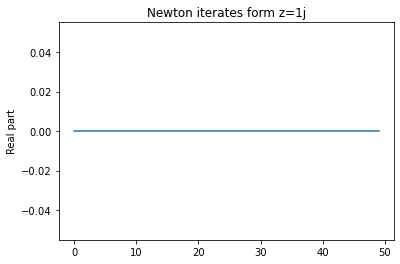

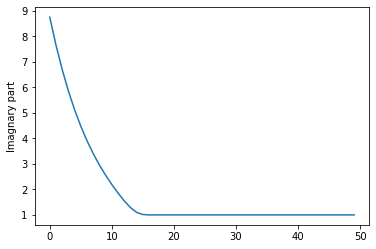

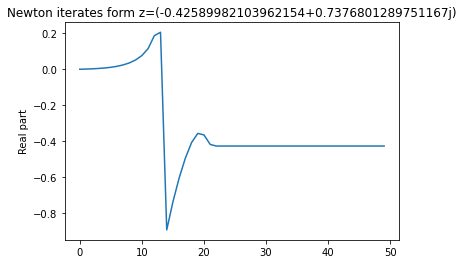

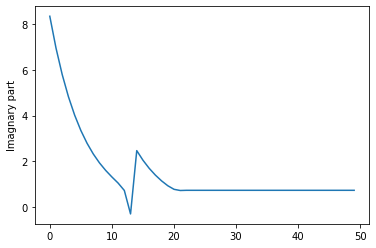

In [116]:
z=0.0 + 10.0j
graficar(0,z)
graficar(1,z)
graficar(2,z)
graficar(3,z)
# graficar(4,z)

## Newton iterates form z=-10.0 + 10.0j

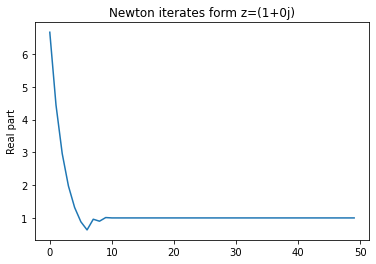

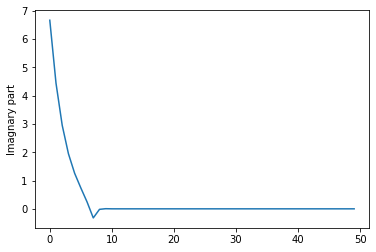

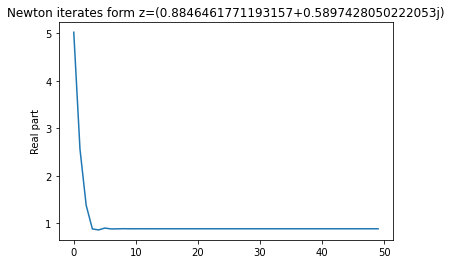

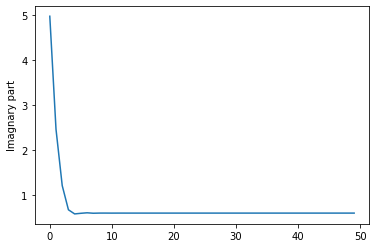

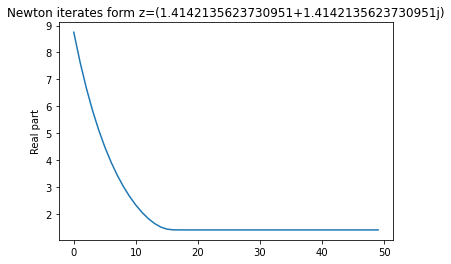

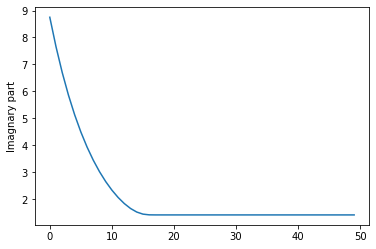

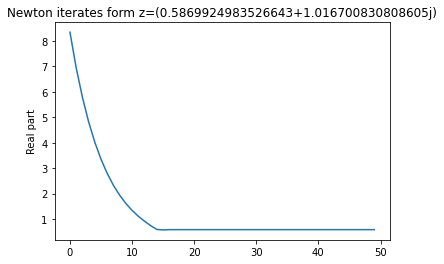

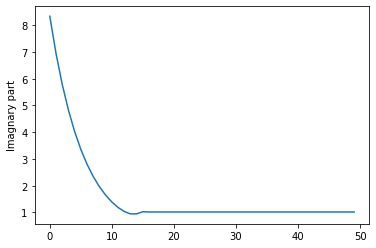

In [117]:
z=10.0 + 10.0j
graficar(0,z)
graficar(1,z)
graficar(2,z)
graficar(3,z)

## Newton iterates form z=-10.0 -10.0j

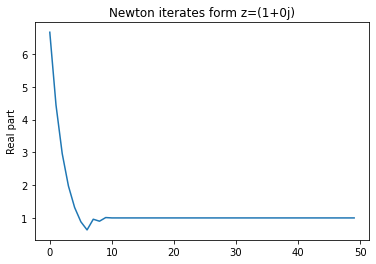

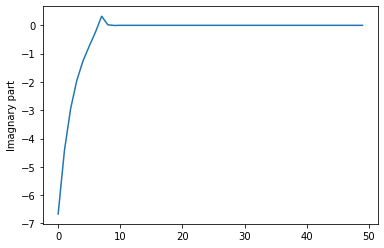

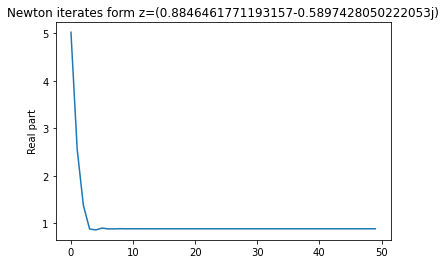

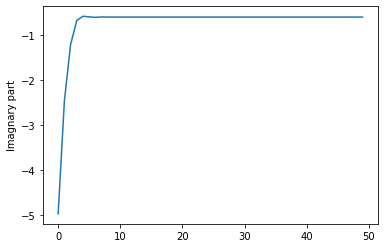

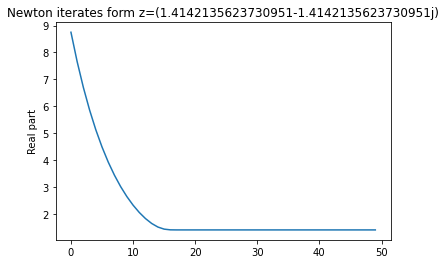

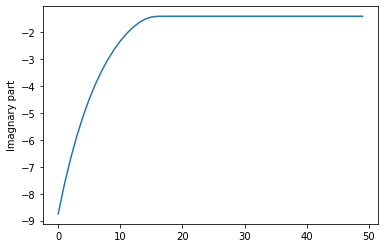

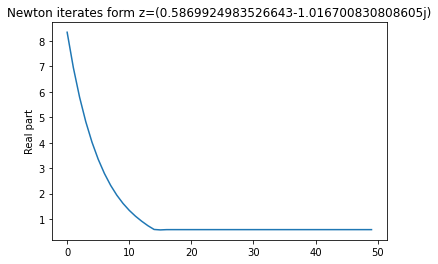

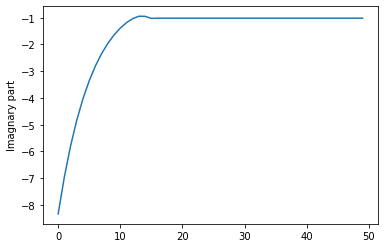

In [118]:
z=10.0 - 10.0j
graficar(0,z)
graficar(1,z)
graficar(2,z)
graficar(3,z)

## Newton iterates form z=-10.0 + 10.0j

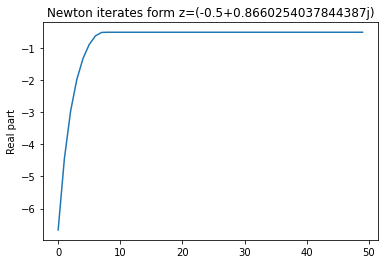

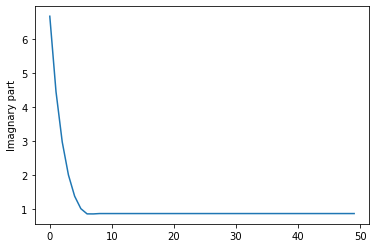

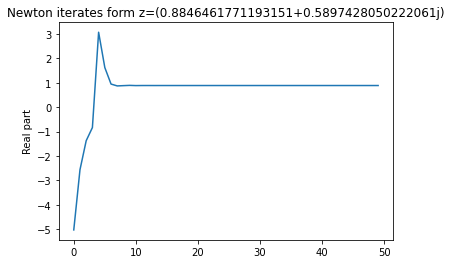

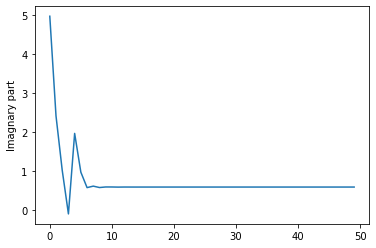

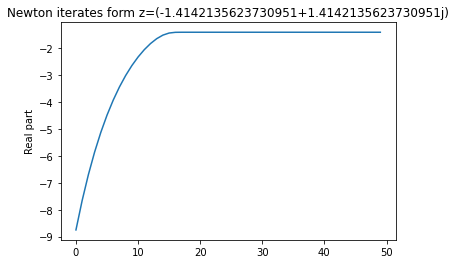

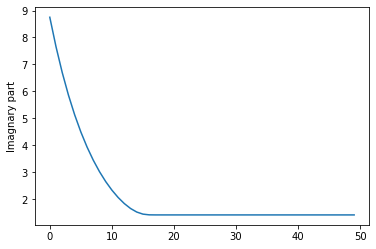

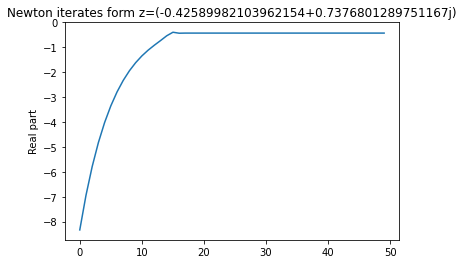

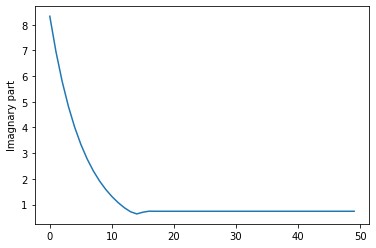

In [119]:
z=-10.0 + 10.0j
graficar(0,z)
graficar(1,z)
graficar(2,z)
graficar(3,z)

## Newton iterates form z=0.0 + 0.0j

In [120]:
z=0.0 + 0.0j
graficar(0,z)
graficar(1,z)
graficar(2,z)
graficar(3,z)

ZeroDivisionError: complex division by zero